[0.4359949  0.02592623 0.54966248 0.43532239 0.4203678  0.33033482
 0.20464863 0.61927097 0.29965467 0.26682728 0.62113383 0.52914209
 0.13457995 0.51357812 0.18443987 0.78533515 0.85397529 0.49423684
 0.84656149 0.07964548]
[-0.74787095  0.00902525 -0.87810789 -0.15643417  0.25657045 -0.98877905
 -0.33882197 -0.23618403 -0.63765501 -1.18761229 -1.42121723 -0.1534952
 -0.26905696  2.23136679 -2.43476758  0.1127265   0.37044454  1.35963386
  0.50185721 -0.8442137 ]
[ 0.31661605  0.16308234 -0.39481017  0.37964461  0.50538432  0.77641335
  0.92579322 -0.70481919  0.88795927  0.87565468 -0.83184465 -0.19743324
  0.72145738  0.13792628  0.67287445 -0.96418258 -0.75704031  0.17216649
 -0.77134048  0.39537911]


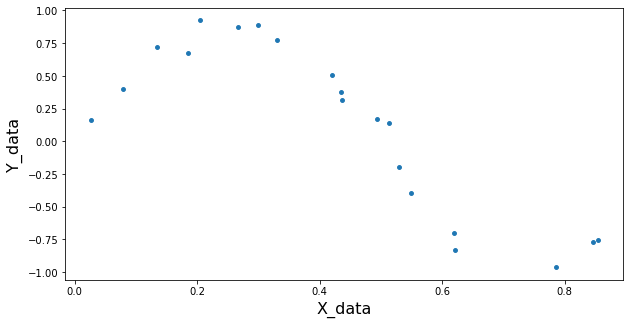

In [515]:
#https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

import torch
import torchvision
import torchvision.transforms as transforms

import numpy as np 

np.random.seed(2)
n_samples=20
x=np.random.uniform(0,1,n_samples)
print(x)

N= np.random.normal(0,1,size=20)
print (N)

y = np.sin(2*np.pi*x) +N*0.1
print(y)

import matplotlib.pyplot as plt 

plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.xlabel('X_data',fontsize=16)
plt.ylabel('Y_data',fontsize=16)
plt.show()

#my contribution
degrees= [0,1,3,9]
x_train=x[0:10]
x_test=x[10:]
y_train=y[0:10]
y_test=y[10:]

In [415]:
train_error=[]
test_error=[]

In [416]:
#degree9

weight9=[]

for i in range(10):
        weight9.append(Variable(torch.Tensor([1.0]),  requires_grad=True))

print(weight9)

[tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True)]


In [417]:

l=0

def forward(x):
    
    temp=0
    
    for i in range(9):
        
        temp+=weight9[i+1][0]*np.power(x,i+1)
        
    temp+=weight9[0][0]
            
    return temp


def loss(x, y):
    y_pred= forward(x) 
    return (y-y_pred) * (y-y_pred)


def gradient(x, y, i):
    res=forward(x)
    
    res=y-res
    
    res=res*np.power(x,i)*2
           
    return res


    
    
print("predict (before training) 9 order", "\n")
for epoch in range(10000):
    loss_value=0   
        
    for x_val, y_val in zip(x_train, y_train):
        
        

        for i in range(1,10):
            
            l = loss(x_val, y_val)
            loss_value+=l
            l.backward()
            
            
            weight9[i].data = weight9[i].data - 0.1 * weight9[i].grad.data
        
            
        for i in range(10):
        
            weight9[i].grad.data.zero_()  
            

        
print("predict (after training)",  "9 order", "\n\n")
print(loss_value*0.1)
train_error.append(loss_value*0.1)

predict (before training) 9 order 

predict (after training) 9 order 


tensor(0.6398, grad_fn=<MulBackward0>)


In [418]:
print(weight9)

[tensor([1.], requires_grad=True), tensor([-0.6561], requires_grad=True), tensor([3.1127], requires_grad=True), tensor([-8.4418], requires_grad=True), tensor([-6.7325], requires_grad=True), tensor([-1.3047], requires_grad=True), tensor([3.0568], requires_grad=True), tensor([5.3822], requires_grad=True), tensor([6.0838], requires_grad=True), tensor([5.8235], requires_grad=True)]


In [419]:
y_pred=[]
loss_value=0

def forward(x):
    
    temp=0
    
    for i in range(9):
        
        temp+=weight9[i+1][0]*np.power(x,i+1)
        
    temp+=weight9[0][0]
            
    return temp

def loss(x, y):
    y_pred= forward(x) 
    return (y_pred-y) * (y_pred-y)

        
for x_val, y_val in zip(x_test, y_test):
            
            y_pred.append(forward(x_val).data)
            loss_value+=loss(x_val,y_val)

            
print(y_pred)

print(loss_value*0.1)
test_error.append(loss_value*0.1)

[tensor(-0.7699), tensor(-0.1223), tensor(0.9453), tensor(-0.0237), tensor(0.9240), tensor(-1.3843), tensor(-0.6251), tensor(0.0920), tensor(-0.7638), tensor(0.9630)]
tensor(0.0671, grad_fn=<MulBackward0>)


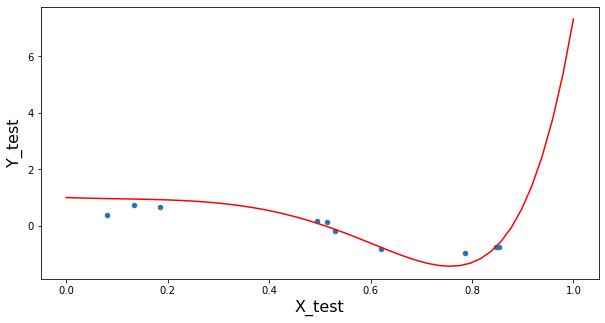

In [420]:

def forward(x):
    
    temp=0
    
    
    for i in range(9):
        
        temp+=weight9[i+1].data*np.power(x,i+1)
        
    temp+=weight9[0].data
    
            
    return temp


x_trace=np.linspace(0,1)
plt.figure(figsize=(10,5))
plt.scatter(x_test,y_test,s=20)
plt.xlabel('X_test',fontsize=16)
plt.ylabel('Y_test',fontsize=16)

plt.plot(x_trace, forward(x_trace).data,color='red')

plt.show()

In [421]:

#degree3
weight3=[]

for i in range(4):
        weight3.append(Variable(torch.Tensor([1.0]),  requires_grad=True))

print(weight3)

[tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True)]


In [422]:
l=0

def forward(x):
    #my contribution
    temp=0
    
    for i in range(3):
        
        temp+=weight3[i+1][0]*np.power(x,i+1)
        
    temp+=weight3[0][0]
            
    return temp


def loss(x, y):
    y_pred= forward(x) 
    return (y-y_pred) * (y-y_pred)


def gradient(x, y, i):
    res=forward(x)
    
    res=y-res
    
    res=res*np.power(x,i)*2
           
    return res


    
    
print("predict (before training) 3 order", "\n")
for epoch in range(10000):
        
        
    for x_val, y_val in zip(x_train, y_train):
        
        loss_value=0

        for i in range(1,4):
            
            l = loss(x_val, y_val)
            loss_value+=l
            l.backward()
            
            
            weight3[i].data = weight3[i].data - 0.1 * weight3[i].grad.data
        
    
        for i in range(4):
        
            weight3[i].grad.data.zero_()  
            

        
print("predict (after training)",  "3 order", "\n\n")
print(loss_value*0.1)

train_error.append(loss_value*0.1)

predict (before training) 3 order 

predict (after training) 3 order 


tensor(0.0003, grad_fn=<MulBackward0>)


In [423]:
print(weight3)

[tensor([1.], requires_grad=True), tensor([-0.5576], requires_grad=True), tensor([2.6227], requires_grad=True), tensor([-10.2898], requires_grad=True)]


In [424]:
y_pred=[]
loss_value=0

def forward(x):
    
    temp=0
    
    for i in range(3):
        
        temp+=weight3[i+1][0]*np.power(x,i+1)
        
    temp+=weight3[0][0]
            
    return temp

def loss(x, y):
    y_pred= forward(x) 
    return (y_pred-y) * (y_pred-y)

        
for x_val, y_val in zip(x_test, y_test):
            
            y_pred.append(forward(x_val).data)
            loss_value+=loss(x_val,y_val)

            
print(y_pred)
print(loss_value*0.1)

test_error.append(loss_value*0.1)

[tensor(-0.8004), tensor(-0.0852), tensor(0.9474), tensor(0.0115), tensor(0.9218), tensor(-2.8043), tensor(-3.9719), tensor(0.1228), tensor(-3.8354), tensor(0.9670)]
tensor(2.3581, grad_fn=<MulBackward0>)


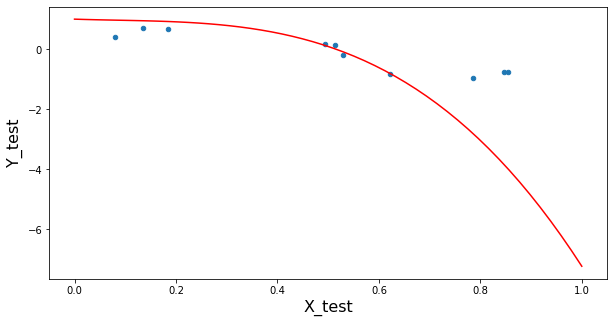

In [425]:
def forward(x):
    
    temp=0
    
    for i in range(3):
        
        temp+=weight3[i+1].data*np.power(x,i+1)
        
    temp+=weight3[0].data
            
    return temp


x_trace=np.linspace(0,1)

plt.figure(figsize=(10,5))
plt.scatter(x_test,y_test,s=20)
plt.xlabel('X_test',fontsize=16)
plt.ylabel('Y_test',fontsize=16)


plt.plot(x_trace, forward(x_trace).data,color='red')

plt.show()

In [426]:
#degree 1

weight1=[]

for i in range(2):
        weight1.append(Variable(torch.Tensor([1.0]),  requires_grad=True))

print(weight1)

[tensor([1.], requires_grad=True), tensor([1.], requires_grad=True)]


In [427]:
l=0

def forward(x):
    
    temp=0
    
    for i in range(1):
        
        temp+=weight1[i+1][0]*np.power(x,i+1)
        
    temp+=weight1[0][0]
            
    return temp


def loss(x, y):
    y_pred= forward(x) 
    return (y_pred-y) * (y_pred-y)


def gradient(x, y, i):
    res=forward(x)
    
    res-=y
    
    res=res*np.power(x,i)*2
           
    return res


    
    
print("predict (before training) 1 order", "\n")
for epoch in range(10000):
    loss_value=0
        
    for x_val, y_val in zip(x_train, y_train):
        
        loss_value=0

        for i in range(1,2):
            
            l = loss(x_val, y_val)
            loss_value+=l
            l.backward()
            
            weight1[i].data = weight1[i].data - 0.1 * weight1[i].grad.data
        
            
        # Manually zero the gradients after updating weights
        for i in range(2):
        
            weight1[i].grad.data.zero_()  
         

        
print("predict (after training)",  "1 order", "\n\n")

print(loss_value*0.1)
train_error.append(loss_value*0.1)

predict (before training) 1 order 

predict (after training) 1 order 


tensor(0.0127, grad_fn=<MulBackward0>)


In [428]:
print(weight1)

[tensor([1.], requires_grad=True), tensor([-1.7828], requires_grad=True)]


In [429]:
y_pred=[]
loss_value=0
def forward(x):
    
    temp=0
    
    for i in range(1):
        
        temp+=weight1[i+1][0]*np.power(x,i+1)
        
    temp+=weight1[0][0]
            
    return temp

def loss(x, y):
    y_pred= forward(x) 
    return (y_pred-y) * (y_pred-y)

        
for x_val, y_val in zip(x_test, y_test):
            
            y_pred.append(forward(x_val).data)
            loss_value+=loss(x_val,y_val)
            
print(y_pred)

print(loss_value*0.1)
test_error.append(loss_value*0.1)

[tensor(-0.1074), tensor(0.0566), tensor(0.7601), tensor(0.0844), tensor(0.6712), tensor(-0.4001), tensor(-0.5225), tensor(0.1189), tensor(-0.5093), tensor(0.8580)]
tensor(0.1252, grad_fn=<MulBackward0>)


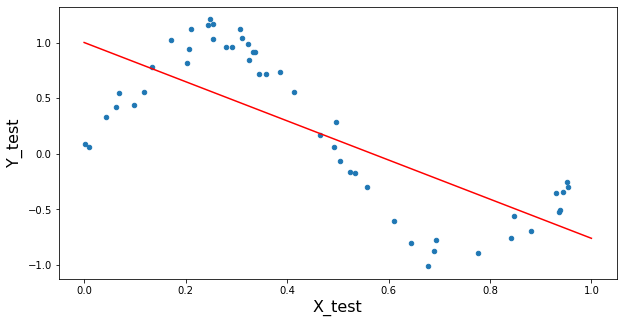

In [413]:

def forward(x):
    
    temp=0
    
    for i in range(1):
        
        temp+=weight1[i+1].data*np.power(x,i+1)
        
    temp+=weight1[0].data
            
    return temp


x_trace=np.linspace(0,1)

plt.figure(figsize=(10,5))
plt.scatter(x_test,y_test,s=20)
plt.xlabel('X_test',fontsize=16)
plt.ylabel('Y_test',fontsize=16)


plt.plot(x_trace, forward(x_trace).data,color='red')

plt.show()

In [430]:
#degree0

weight0 =Variable(torch.Tensor([1.0]),  requires_grad=True)
print(weight0)

tensor([1.], requires_grad=True)


In [431]:
weight0 =Variable(torch.Tensor([1.0]),  requires_grad=True)
print(weight0)

l=0

def forward(x):          
    return weight0


def loss(x, y):
    y_pred= forward(x) 
    return (y_pred-y) * (y_pred-y)

    
print("predict (before training) 0 order", "\n")
for epoch in range(10000):
    
    loss_value=0
        
    for x_val, y_val in zip(x_train, y_train):
        
                 
            l = loss(x_val, y_val)
            loss_value+=l
            l.backward()
            
            
            weight0.data = weight0.data - 0.1 * weight0.grad.data
        
        
            weight0.grad.data.zero_()  
            

        
print("predict (after training)",  "0 order", "\n\n")

print(loss_value*0.1)
train_error.append(loss_value*0.1)

predict (before training) 0 order 

predict (after training) 0 order 


tensor([0.3396], grad_fn=<MulBackward0>)


In [432]:
print(weight0)

tensor([0.4883], requires_grad=True)


In [434]:
y_pred=[]
loss_value=0

def forward(x):           
    return weight0

def loss(x, y):
    y_pred= forward(x) 
    return (y_pred-y) * (y_pred-y)

        
for x_val, y_val in zip(x_test, y_test):
            
            y_pred.append(forward(x_val).data)
            loss_value+=loss(x_val,y_val)
            
print(y_pred)

print(loss_value*0.1)
test_error.append(loss_value*0.1)

[tensor([0.4883]), tensor([0.4883]), tensor([0.4883]), tensor([0.4883]), tensor([0.4883]), tensor([0.4883]), tensor([0.4883]), tensor([0.4883]), tensor([0.4883]), tensor([0.4883])]
tensor([0.7779], grad_fn=<MulBackward0>)


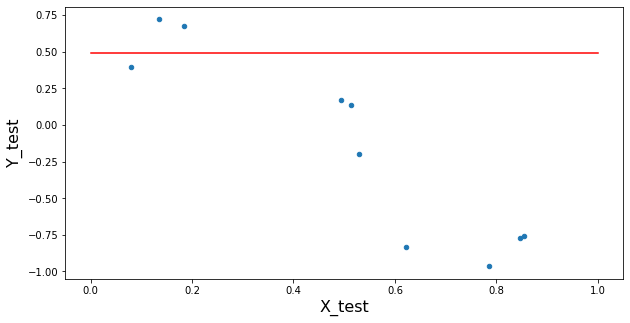

In [435]:
def forward(x):           
    return weight0.data*np.power(x,0)

x_trace=np.linspace(0,1)

plt.figure(figsize=(10,5))
plt.scatter(x_test,y_test,s=20)
plt.xlabel('X_test',fontsize=16)
plt.ylabel('Y_test',fontsize=16)


plt.plot(x_trace, forward(x_trace),color='red')

plt.show()

In [444]:
print(train_error)
print(test_error)

[tensor(0.6398, grad_fn=<MulBackward0>), tensor(0.0003, grad_fn=<MulBackward0>), tensor(0.0127, grad_fn=<MulBackward0>), tensor([0.3396], grad_fn=<MulBackward0>)]
[tensor(0.0671, grad_fn=<MulBackward0>), tensor(2.3581, grad_fn=<MulBackward0>), tensor(0.1252, grad_fn=<MulBackward0>), tensor([0.7779], grad_fn=<MulBackward0>)]


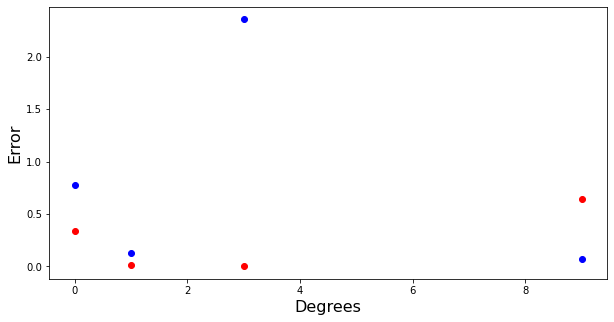

In [465]:
#train vs test error

degrees=[9,3,1,0]



plt.figure(figsize=(10,5))

plt.xlabel('Degrees',fontsize=16)
plt.ylabel('Error',fontsize=16)


for i in range(4):
    plt.scatter(degrees[i], test_error[i].data,color='blue')
    plt.scatter(degrees[i], train_error[i].data,color='red')
    
    



[0.88526367 0.98313836 0.65290695 0.47773635 0.08778755 0.55895079
 0.18115023 0.51440206 0.60893015 0.83321249 0.32375058 0.98886209
 0.99495026 0.82615082 0.69415255 0.7336698  0.87526881 0.95151015
 0.85226293 0.64093864 0.07349838 0.62338471 0.35321389 0.16477862
 0.89316619 0.82489048 0.52663842 0.46344926 0.48930129 0.26072002
 0.40263792 0.43666988 0.01505613 0.89290588 0.02914932 0.37289288
 0.09587331 0.19696432 0.94242061 0.37127117 0.7290008  0.12616011
 0.25128292 0.8812353  0.90329615 0.28763526 0.96711313 0.66809934
 0.50300677 0.37800241 0.33736829 0.95201071 0.69333383 0.5341017
 0.0434897  0.24755088 0.94317072 0.55686017 0.35751823 0.00945037
 0.25354827 0.25422669 0.17068553 0.34497996 0.20264905 0.06290154
 0.0979604  0.4967275  0.06966059 0.93515356 0.20609764 0.46421235
 0.41466826 0.29133772 0.32352851 0.21159758 0.28026829 0.11710504
 0.68925187 0.64452619 0.3115294  0.88029896 0.38637573 0.6110893
 0.52316933 0.3250568  0.92979042 0.84820141 0.84112295 0.954288

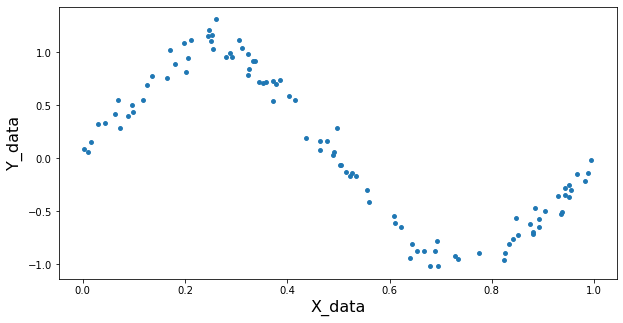

In [380]:
# for 100 data


n_samples=100
x=np.random.uniform(0,1,n_samples)
print(x)

N= np.random.normal(0,1,size=100)
print (N)

y = np.sin(2*np.pi*x) +N*0.1
print(y)

import matplotlib.pyplot as plt 

plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.xlabel('X_data',fontsize=16)
plt.ylabel('Y_data',fontsize=16)
plt.show()


degrees= [0,1,3,9]
x_train=x[0:50]
x_test=x[50:]
y_train=y[0:50]
y_test=y[50:]

In [392]:
weight9=[]

for i in range(100):
        weight9.append(Variable(torch.Tensor([1.0]),  requires_grad=True))

print(weight9)

[tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], 

In [393]:
l=0

def forward(x):
    
    temp=0
    
    for i in range(9):
        
        temp+=weight9[i+1][0]*np.power(x,i+1)
        
    temp+=weight9[0][0]
            
    return temp


def loss(x, y):
    y_pred= forward(x) 
    return (y-y_pred) * (y-y_pred)


def gradient(x, y, i):
    res=forward(x)
    
    res=y-res
    
    res=res*np.power(x,i)*2
           
    return res


    
    
print("predict (before training) 9 order", "\n")
for epoch in range(1000):
        
        
    for x_val, y_val in zip(x_train, y_train):
        
        

        for i in range(1,10):
            
            l = loss(x_val, y_val)
            l.backward()
            
            
            weight9[i].data = weight9[i].data - 0.01 * weight9[i].grad.data
        
            
        # Manually zero the gradients after updating weights
        for i in range(10):
        
            weight9[i].grad.data.zero_()  
            

        
print("predict (after training)",  "9 order", "\n\n")

predict (before training) 9 order 

predict (after training) 9 order 




In [319]:
y_pred=[]

def forward(x):
    
    temp=0
    
    for i in range(9):
        
        temp+=weight9[i+1][0]*np.power(x,i+1)
        
    temp+=weight9[0][0]
            
    return temp

def loss(x, y):
    y_pred= forward(x) 
    return (y_pred-y) * (y_pred-y)

        
for x_val, y_val in zip(x_test, y_test):
            
            y_pred.append(forward(x_val).data)

            
print(y_pred)

[tensor(-0.2550), tensor(0.9731), tensor(0.5415), tensor(-1.9883), tensor(0.4092), tensor(0.9938), tensor(0.8111), tensor(0.9800), tensor(0.5546), tensor(-0.2946), tensor(-1.9366), tensor(-0.6305), tensor(-1.7760), tensor(0.9105), tensor(0.7270), tensor(-0.1368), tensor(0.5702), tensor(0.9882), tensor(0.1350), tensor(0.2719), tensor(-0.0263), tensor(0.6581), tensor(0.7902), tensor(0.4764), tensor(-2.0007), tensor(-1.6040), tensor(0.5015), tensor(0.9973), tensor(-1.9266), tensor(0.7730), tensor(-0.5001), tensor(0.9943), tensor(-1.0681), tensor(0.4743), tensor(0.0102), tensor(0.3773), tensor(0.5865), tensor(-0.2964), tensor(-0.2199), tensor(0.9558), tensor(0.6825), tensor(0.9895), tensor(-1.6148), tensor(-1.0333), tensor(0.8586), tensor(0.3703), tensor(-0.9322), tensor(-1.0628), tensor(0.9093), tensor(-1.8599)]


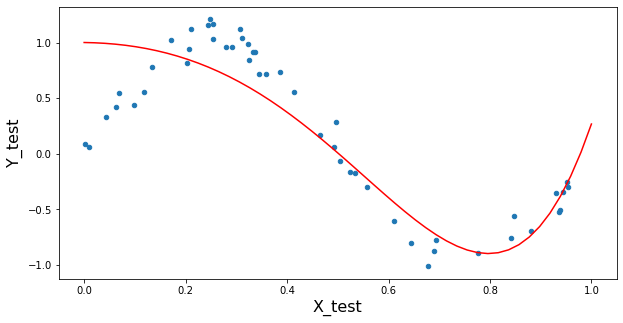

In [394]:

def forward(x):
    
    temp=0
    
    for i in range(9):
        
        temp+=weight9[i+1][0].data*np.power(x,i+1)
        
    temp+=weight9[0][0].data
            
    return temp

x_trace=np.linspace(0,1,50)

plt.figure(figsize=(10,5))
plt.scatter(x_test,y_test,s=20)
plt.xlabel('X_test',fontsize=16)
plt.ylabel('Y_test',fontsize=16)

plt.plot(x_trace, forward(x_trace).data,color='red')

plt.show()

In [478]:
#regularization

weightl1=[]

for j in range(10):
        weightl1.append(Variable(torch.Tensor([1.0]),  requires_grad=True))


print(weightl1)

{0: [tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True)], 1: [tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True)], 2: [tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True),

In [512]:
#youtube.com
#https://www.youtube.com/watch?v=VqKq78PVO9g
#https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a

#lambda=1/1000......same can be done for different lambda values

la=1/1000     #replace lambda value here

lamb_train_error=[]

weightl1=[]

for j in range(10):
        weightl1.append(Variable(torch.Tensor([1.0]),  requires_grad=True))


def forward(x):
    
    temp=0
    
    for i in range(9):
        
        temp+=weightl1[i+1][0].data*np.power(x,i+1)
        
    temp+=weightl1[0][0].data
            
    return temp


def loss(x, y):
    y_pred= forward(x) 
    return (y-y_pred) * (y-y_pred)

    
print("predict (before training) 9 order", "\n")

for epoch in range(10):
        loss_value=0   
        
        for x_val, y_val in zip(x_train, y_train):
        
        

            for i in range(1,10):
                
                #my contribution
                sum1=0
                for k in range(10):
                    sum1+=weightl1[k][0]*weightl1[k][0]
                    
                l = 0.5*loss(x_val, y_val) +0.5*la*sum1
                loss_value+=l
                l.backward()
            
            
                weightl1[i].data = weightl1[i].data - 0.1 * weightl1[i].grad.data
        
            
            for i in range(10):
        
                weightl1[i].grad.data.zero_()  

        
print("predict (after training)",  "9 order", "\n\n")
lamb_train_error.append(loss_value)
    
    
    

predict (before training) 9 order 

predict (after training) 9 order 




In [513]:
y_pred=[]
loss_value=0
lamb_test_error=[]

def forward(x):
    
    temp=0
    
    for i in range(9):
        
        temp+=weightl1[i+1][0]*np.power(x,i+1)
        
    temp+=weightl1[0][0]
            
    return temp

def loss(x, y):
    y_pred= forward(x) 
    return (y_pred-y) * (y_pred-y)


for x_val, y_val in zip(x_test, y_test):
            
            y_pred.append(forward(x_val).data)
            
            sum1=0
            for k in range(10):
                    sum1+=weightl1[k].data
                    
            l = 0.5*loss(x_val, y_val) +0.5*la*sum1
            loss_value+=l

            
    
lamb_test_error.append(loss_value)

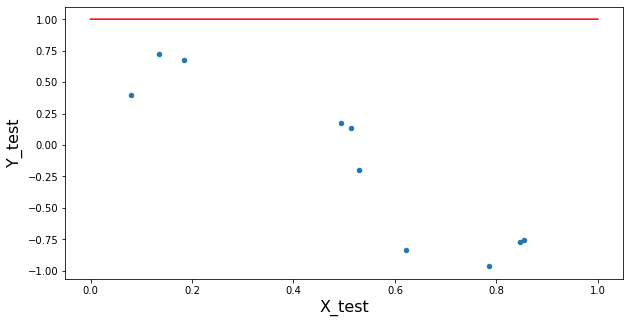

In [514]:
def forward(x):
    
    temp=0
    
    for i in range(9):
        
        temp+=weightl1[i+1][0].data*np.power(x,i+1)
        
    temp+=weightl1[0][0].data
            
    return temp

x_trace=np.linspace(0,1,50)

plt.figure(figsize=(10,5))
plt.scatter(x_test,y_test,s=20)
plt.xlabel('X_test',fontsize=16)
plt.ylabel('Y_test',fontsize=16)

plt.plot(x_trace, forward(x_trace).data,color='red')

plt.show()

In [516]:
#my experiment for degree 15

weight15=[]

for i in range(16):
        weight15.append(Variable(torch.Tensor([1.0]),  requires_grad=True))

print(weight15)

[tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True), tensor([1.], requires_grad=True)]


In [517]:
l=0

def forward(x):
    
    temp=0
    
    for i in range(15):
        
        temp+=weight15[i+1][0]*np.power(x,i+1)
        
    temp+=weight15[0][0]
            
    return temp


def loss(x, y):
    y_pred= forward(x) 
    return (y-y_pred) * (y-y_pred)


def gradient(x, y, i):
    res=forward(x)
    
    res=y-res
    
    res=res*np.power(x,i)*2
           
    return res


    
    
print("predict (before training) 15 order", "\n")
for epoch in range(10000):
    loss_value=0   
        
    for x_val, y_val in zip(x_train, y_train):
        
        

        for i in range(1,16):
            
            l = loss(x_val, y_val)
            loss_value+=l
            l.backward()
            
            
            weight15[i].data = weight15[i].data - 0.1 * weight15[i].grad.data
        
            
        # Manually zero the gradients after updating weights
        for i in range(16):
        
            weight15[i].grad.data.zero_()  
            

        
print("predict (after training)",  "9 order", "\n\n")
print(loss_value*0.1)


predict (before training) 15 order 



KeyboardInterrupt: 

In [ ]:

def forward(x):
    
    temp=0
    
    
    for i in range(15):
        
        temp+=weight15[i+1].data*np.power(x,i+1)
        
    temp+=weight15[0].data
    
            
    return temp


x_trace=np.linspace(0,1)
plt.figure(figsize=(10,5))
plt.scatter(x_test,y_test,s=20)
plt.xlabel('X_test',fontsize=16)
plt.ylabel('Y_test',fontsize=16)

plt.plot(x_trace, forward(x_trace).data,color='red')

plt.show()